In [146]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [147]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [148]:
parallel_data = pd.read_csv('parallel_res_new.csv')
sync_data = pd.read_csv('sync_res.csv')

In [149]:
parallel_map_criteria = np.zeros(shape = (len(parallel_data['procN'].unique()), len(parallel_data['taskN'].unique())))
sync_map_criteria = np.zeros(shape=(len(parallel_data['procN'].unique()), len(parallel_data['taskN'].unique())))

for index, procN in enumerate(parallel_data['procN'].unique()):
    parallel_map_criteria[index] = parallel_data[parallel_data['procN'] == procN]['criteria']


for index, procN in enumerate(sync_data['procN'].unique()):
    sync_map_criteria[index] = sync_data[sync_data['procN'] == procN]['criteria']

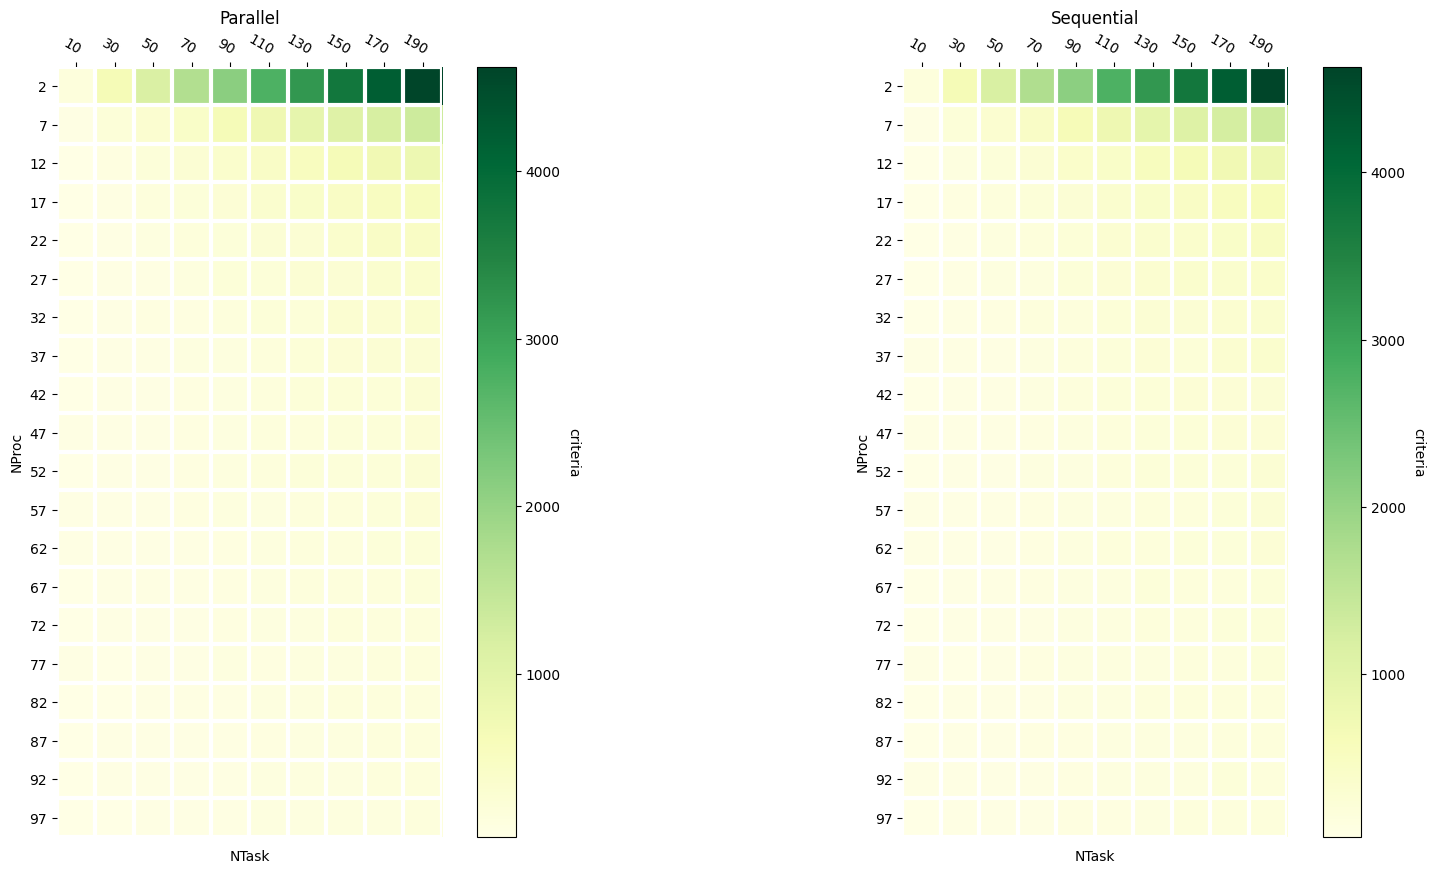

In [150]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(10)
fig.set_figwidth(20)

im_par, cbar_par = heatmap(parallel_map_criteria, parallel_data['procN'].unique(), parallel_data['taskN'].unique(), ax=ax[0],
                           cmap="YlGn", cbarlabel="criteria")
ax[0].set_title("Parallel")
ax[0].set_ylabel("NProc")
ax[0].set_xlabel("NTask")
im_syn, cbar_syn = heatmap(sync_map_criteria, sync_data['procN'].unique(), sync_data['taskN'].unique(), ax=ax[1],
                           cmap="YlGn", cbarlabel="criteria")
ax[1].set_title("Sequential")
ax[1].set_ylabel("NProc")
ax[1].set_xlabel("NTask")
plt.show()


In [151]:
parallel_map_time = np.zeros(shape=(len(parallel_data['procN'].unique()), len(parallel_data['taskN'].unique())))
sync_map_time = np.zeros(shape=(len(parallel_data['procN'].unique()), len(parallel_data['taskN'].unique())))

for index, procN in enumerate(parallel_data['procN'].unique()):
    parallel_map_time[index] = parallel_data[parallel_data['procN'] == procN]['timeWork']

for index, procN in enumerate(sync_data['procN'].unique()):
    sync_map_time[index] = sync_data[sync_data['procN'] == procN]['timeWork']

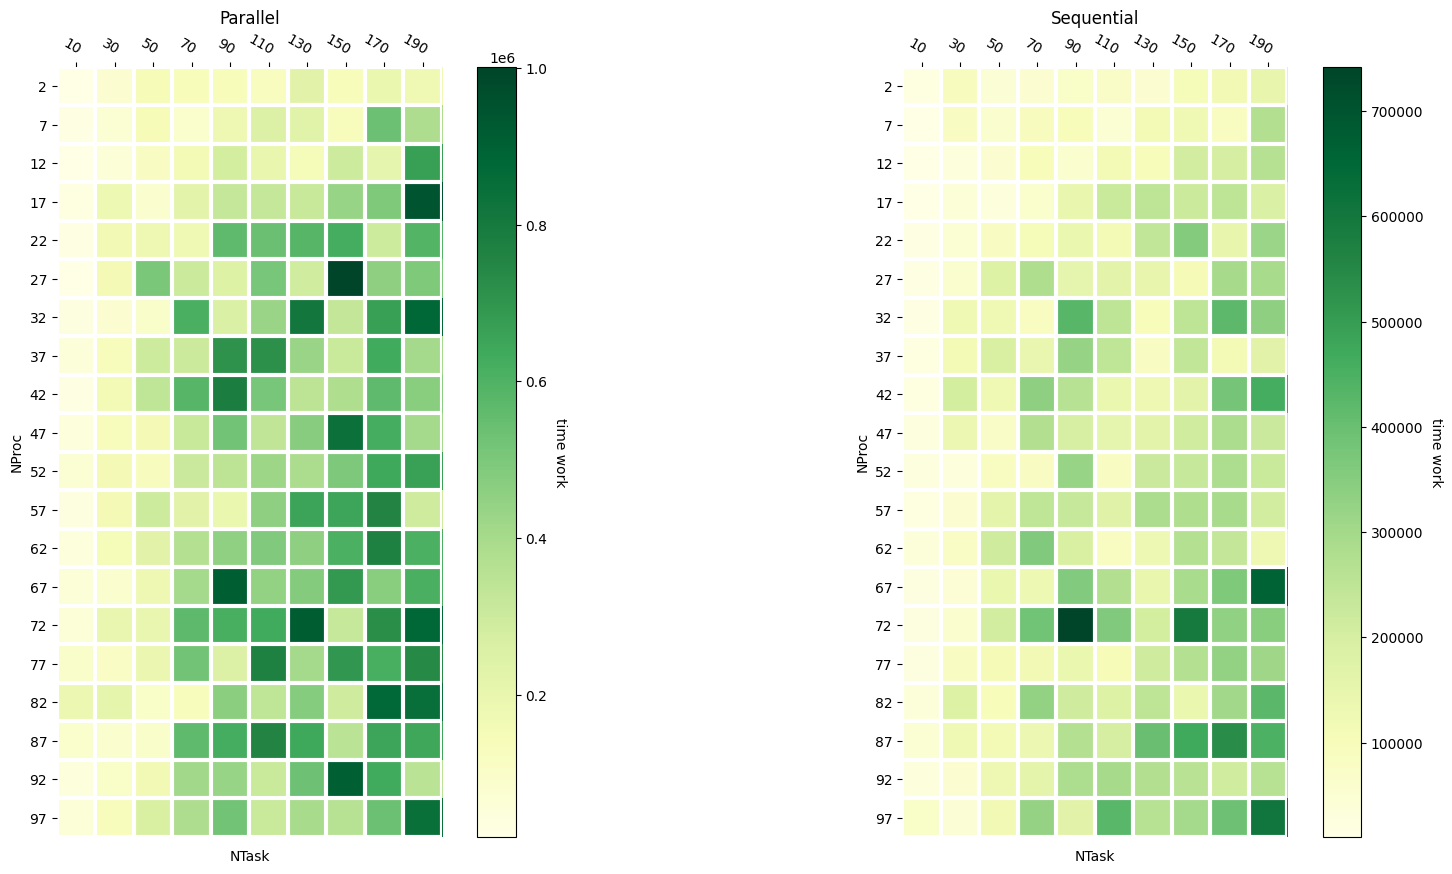

In [152]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(10)
fig.set_figwidth(20)

im_par, cbar_par = heatmap(parallel_map_time, parallel_data['procN'].unique(), parallel_data['taskN'].unique(),
                           ax=ax[0],
                           cmap="YlGn", cbarlabel="time work")
ax[0].set_title("Parallel")
ax[0].set_ylabel("NProc")
ax[0].set_xlabel("NTask")
im_syn, cbar_syn = heatmap(sync_map_time, sync_data['procN'].unique(), sync_data['taskN'].unique(), ax=ax[1],
                           cmap="YlGn", cbarlabel="time work")
ax[1].set_title("Sequential")
ax[1].set_ylabel("NProc")
ax[1].set_xlabel("NTask")
plt.show()


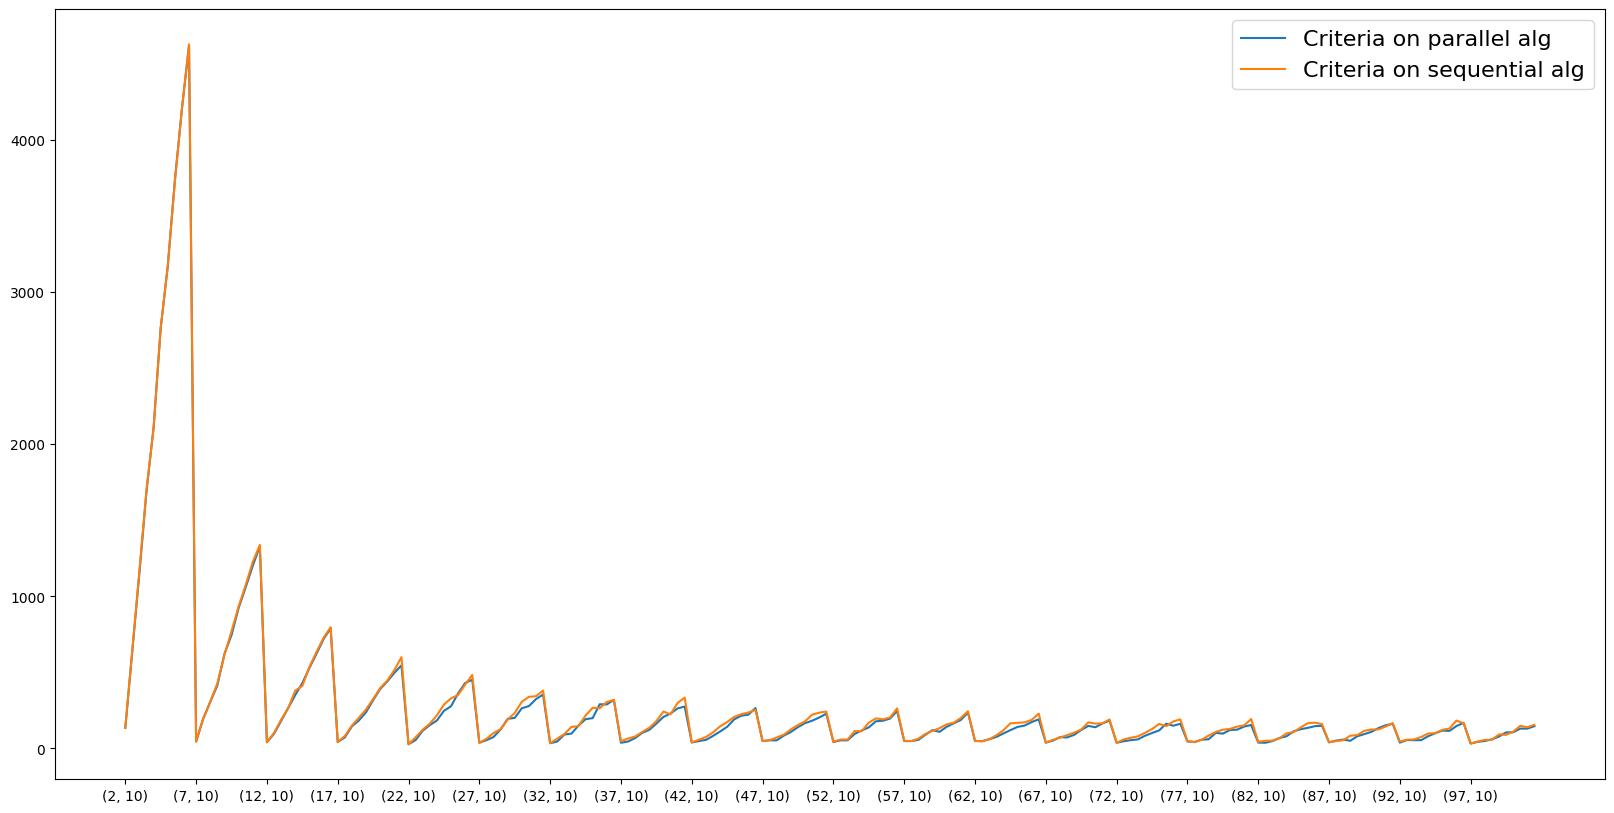

In [153]:
proc_task = [x for x in zip(parallel_data['procN'], parallel_data['taskN'])]

fig, axs = plt.subplots()
axs.plot(np.array(parallel_data['criteria']), label='Criteria on parallel alg')
axs.plot(np.array(sync_data['criteria']), label='Criteria on sequential alg')
axs.set_xticks(list(range(0, len(parallel_data['criteria']), 10)), labels=proc_task[::10])
fig.set_figheight(10)
fig.set_figwidth(20)
axs.legend(prop={"size": 16})
plt.show()

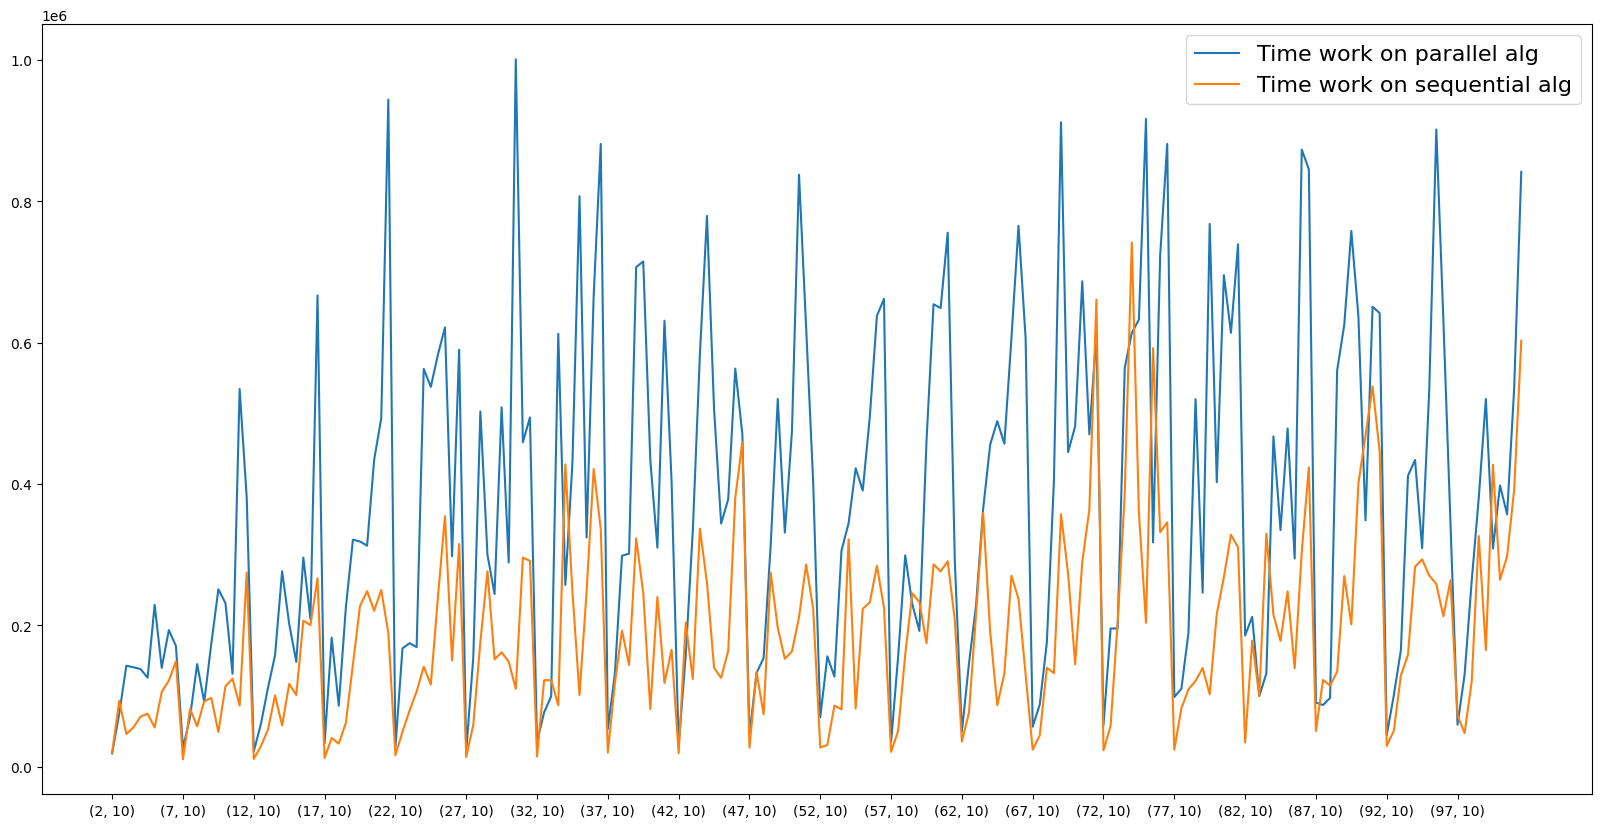

In [154]:
fig, axs = plt.subplots()
axs.plot(np.array(parallel_data['timeWork']), label='Time work on parallel alg')
axs.plot(np.array(sync_data['timeWork']), label='Time work on sequential alg')
axs.set_xticks(list(range(0, len(parallel_data['criteria']), 10)), labels=proc_task[::10])
fig.set_figheight(10)
fig.set_figwidth(20)
axs.legend(prop={"size": 16})
plt.show()

In [155]:
parallel_data = pd.read_csv('parallel_hard_res_new.csv')
sync_data = pd.read_csv('sync_hard_res_new.csv')

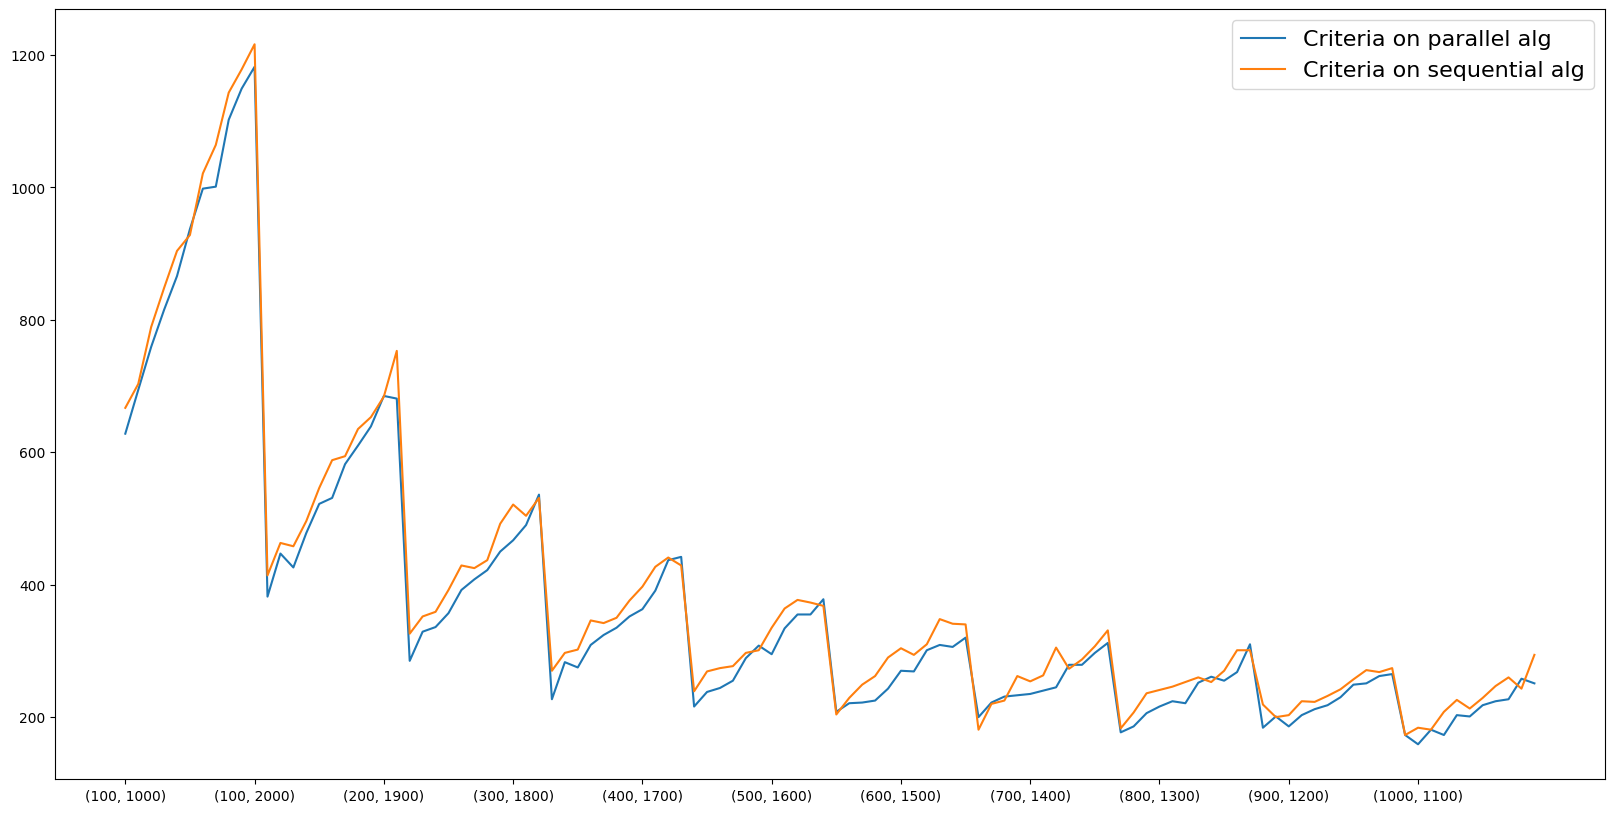

In [156]:
proc_task = [x for x in zip(parallel_data['procN'], parallel_data['taskN'])]

fig, axs = plt.subplots()
axs.plot(np.array(parallel_data['criteria']), label='Criteria on parallel alg')
axs.plot(np.array(sync_data['criteria']), label='Criteria on sequential alg')
axs.set_xticks(list(range(0, len(parallel_data['criteria']), 10)), labels=proc_task[::10])
fig.set_figheight(10)
fig.set_figwidth(20)
axs.legend(prop={"size": 16})
plt.show()

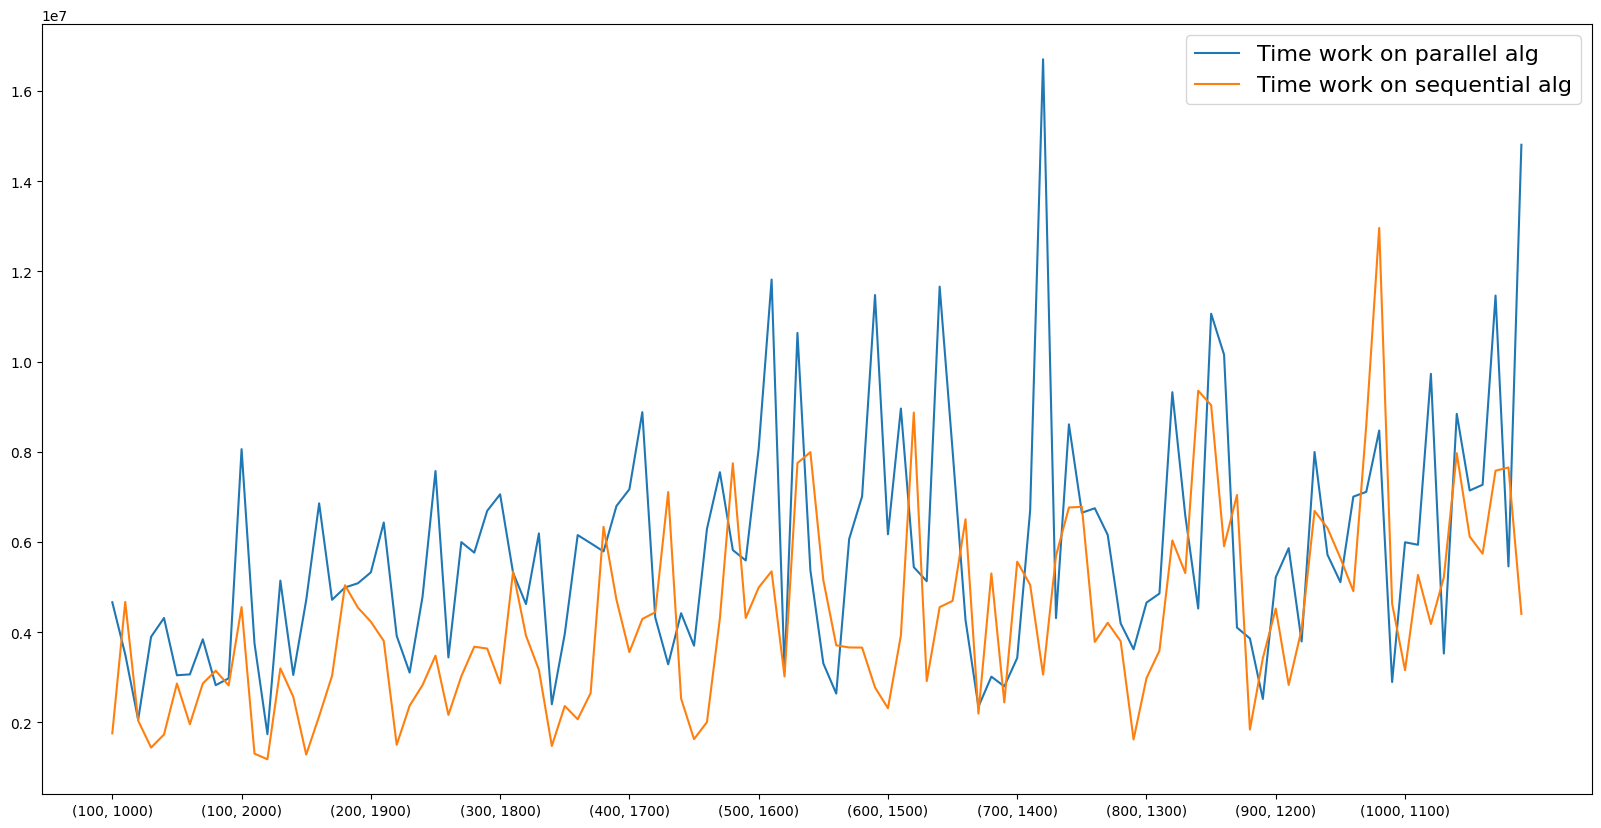

In [157]:
fig, axs = plt.subplots()
axs.plot(np.array(parallel_data['timeWork']), label='Time work on parallel alg')
axs.plot(np.array(sync_data['timeWork']), label='Time work on sequential alg')
axs.set_xticks(list(range(0, len(parallel_data['criteria']), 10)), labels=proc_task[::10])
fig.set_figheight(10)
fig.set_figwidth(20)
axs.legend(prop={"size": 16})
plt.show()